Exercise 8.

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets

def load_iris():
    iris = datasets.load_iris()
    X = iris['data'][:, (2, 3)]
    y = iris['target'].astype(np.float64)
    return X, y

In [4]:
X, y = load_iris()

In [5]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

linear_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LinearSVC(loss='hinge', random_state=42)),
])
linear_svc.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', LinearSVC(loss='hinge', random_state=42))])

In [6]:
from sklearn.svm import SVC

svc = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='linear', random_state=42)),
])
svc.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', SVC(kernel='linear', random_state=42))])

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier(loss='hinge', random_state=42))
])
sgd_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', SGDClassifier(random_state=42))])

In [8]:
w1 = -linear_svc.named_steps['clf'].coef_[0, 0] / linear_svc.named_steps['clf'].coef_[0, 1]
b1 = -linear_svc.named_steps['clf'].intercept_[0] / linear_svc.named_steps['clf'].coef_[0, 1]

w2 = -svc.named_steps['clf'].coef_[0, 0] / svc.named_steps['clf'].coef_[0, 1]
b2 = -svc.named_steps['clf'].intercept_[0] / svc.named_steps['clf'].coef_[0, 1]

w3 = -sgd_clf.named_steps['clf'].coef_[0, 0] / sgd_clf.named_steps['clf'].coef_[0, 1]
b3 = -sgd_clf.named_steps['clf'].intercept_[0] / sgd_clf.named_steps['clf'].coef_[0, 1]

In [9]:
scaler = StandardScaler()
scaler.fit(X)

line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

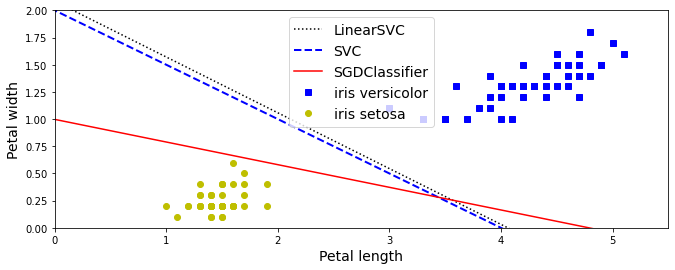

In [10]:
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label='iris versicolor')
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label='iris setosa')
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

In [11]:
C = 5
alpha = 1 / (C * len(X))

linear_svc2 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LinearSVC(C=C, loss='hinge', random_state=42)),
])
linear_svc2.fit(X, y)

svc2 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(C=C, kernel='linear', random_state=42)),
])
svc2.fit(X, y)

sgd_clf2 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier(loss='hinge', random_state=42, max_iter=1000,  
                          learning_rate="constant", eta0=0.001, alpha=alpha, tol=1e-3))
])
sgd_clf2.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 SGDClassifier(alpha=0.0013333333333333333, eta0=0.001,
                               learning_rate='constant', random_state=42))])

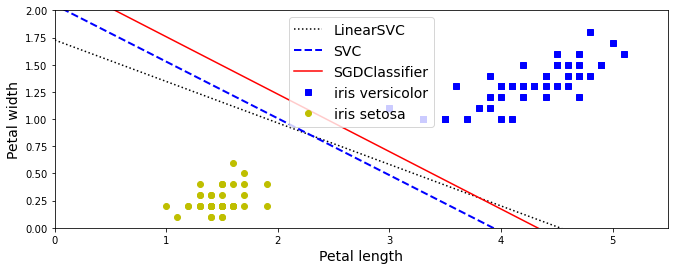

In [12]:
w1 = -linear_svc2.named_steps['clf'].coef_[0, 0] / linear_svc2.named_steps['clf'].coef_[0, 1]
b1 = -linear_svc2.named_steps['clf'].intercept_[0] / linear_svc2.named_steps['clf'].coef_[0, 1]

w2 = -svc2.named_steps['clf'].coef_[0, 0] / svc2.named_steps['clf'].coef_[0, 1]
b2 = -svc2.named_steps['clf'].intercept_[0] / svc2.named_steps['clf'].coef_[0, 1]

w3 = -sgd_clf2.named_steps['clf'].coef_[0, 0] / sgd_clf2.named_steps['clf'].coef_[0, 1]
b3 = -sgd_clf2.named_steps['clf'].intercept_[0] / sgd_clf2.named_steps['clf'].coef_[0, 1]

line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label='iris versicolor')
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label='iris setosa')
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

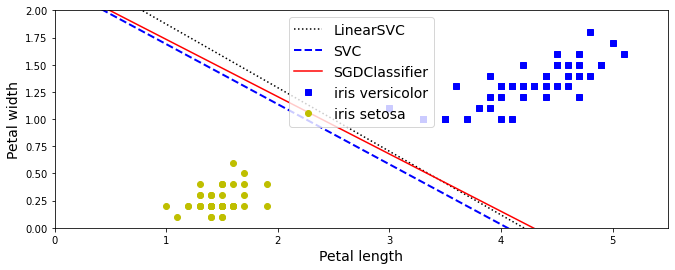

In [13]:
C = 0.1
alpha = 1 / (C * len(X))

linear_svc2 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LinearSVC(C=C, loss='hinge', random_state=42)),
])
linear_svc2.fit(X, y)

svc2 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(C=C, kernel='linear', random_state=42)),
])
svc2.fit(X, y)

sgd_clf2 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier(loss='hinge', random_state=42, max_iter=1000,  
                          learning_rate="constant", eta0=0.001, alpha=alpha, tol=1e-3))
])
sgd_clf2.fit(X, y)

w1 = -linear_svc2.named_steps['clf'].coef_[0, 0] / linear_svc2.named_steps['clf'].coef_[0, 1]
b1 = -linear_svc2.named_steps['clf'].intercept_[0] / linear_svc2.named_steps['clf'].coef_[0, 1]

w2 = -svc2.named_steps['clf'].coef_[0, 0] / svc2.named_steps['clf'].coef_[0, 1]
b2 = -svc2.named_steps['clf'].intercept_[0] / svc2.named_steps['clf'].coef_[0, 1]

w3 = -sgd_clf2.named_steps['clf'].coef_[0, 0] / sgd_clf2.named_steps['clf'].coef_[0, 1]
b3 = -sgd_clf2.named_steps['clf'].intercept_[0] / sgd_clf2.named_steps['clf'].coef_[0, 1]

line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label='iris versicolor')
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label='iris setosa')
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()